# Butterfly Classification
<p style="text-align:center">
    <img src="flying.png" width="400">
</p>



#### Introduction
   
The goal of this project is to build a machine learning model that can classify butterfly species based on image data. Accurate classification of butterfly species is useful in various ecological and conservation efforts, and computer vision offers a scalable way to automate this task.

In [162]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import matplotlib.pyplot as plt
import pandas as pd

In [163]:
df = pd.read_csv("Training_set.csv")

In [164]:
df.head(5)

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [165]:
df.isnull().sum()

filename    0
label       0
dtype: int64

#### Dataset Overview

The dataset consists of images of butterflies belonging to multiple species. Each image is labeled with the corresponding species name. This is a multiclass image classification problem.

Things to mention:

- Number of classes/species

- Total number of images

- Image size

Source of the dataset (Kaggle)

In [166]:
df['filename'] = 'F://AI//FirstClassification//train//' + df['filename']

In [167]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

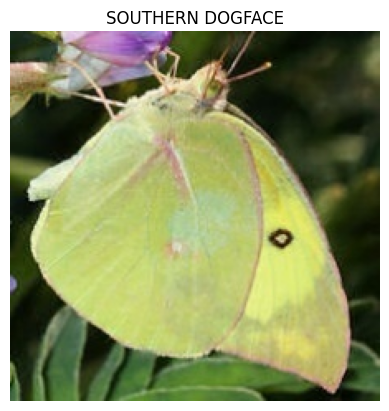

In [168]:
img_path = df.loc[0, 'filename']  
img = Image.open(img_path)      

plt.imshow(img)
plt.axis('off') 
plt.title(df.loc[0, 'label'])
plt.show()

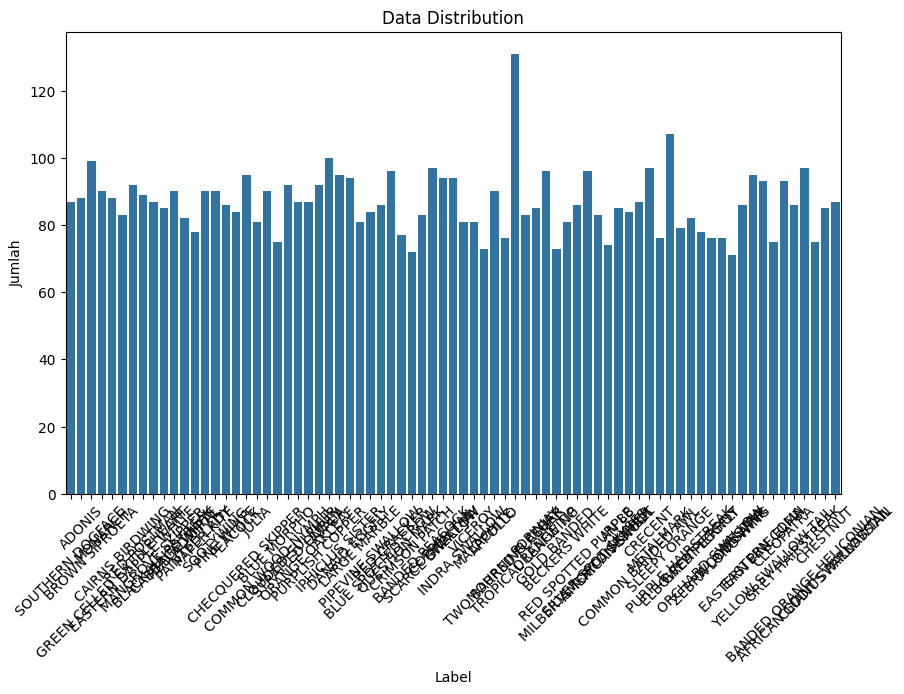

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x='label', data=train_df)

plt.title("Data Distribution")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  6499 non-null   object
 1   label     6499 non-null   object
dtypes: object(2)
memory usage: 101.7+ KB


### Data Preprocessing
Before training the model, we performed several preprocessing steps:

- Image resizing: All images were resized to a fixed dimension (e.g., 150x150 pixels) to ensure consistency.

- Normalization: Pixel values were normalized to range between 0 and 1 to improve training performance.

- Data augmentation: Applied transformations such as rotation, zoom, horizontal flip, etc., to increase diversity and reduce overfitting.

In [174]:
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col='filename',
    y_col='label',
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col='filename',
    y_col='label',
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 5200 validated image filenames belonging to 75 classes.
Found 1299 validated image filenames belonging to 75 classes.


#### Train-Test Split
The dataset was divided into training and validation sets using an 80:20 ratio (or another split, if different). This allows us to train the model on one set and evaluate its performance on unseen data.



In [175]:
num_classes = len(train_generator.class_indices)

model = Sequential([
    Input(shape=(150, 150,3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

## Fitted Model

We used a Convolutional Neural Network (CNN) architecture to learn patterns from image data.

Key points to describe:

- Architecture (e.g., number of layers, filter sizes, activation functions)
- Optimization algorithm (e.g., Adam, SGD)

- Loss function used (e.g., categorical crossentropy for multiclass)

In [176]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10


C:\Users\MrBento\anaconda3\envs\streamlit-env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


325/325 ━━━━━━━━━━━━━━━━━━━━ 43s 127ms/step - accuracy: 0.0393 - loss: 4.2022 - val_accuracy: 0.1694 - val_loss: 3.4236
Epoch 2/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - accuracy: 0.2845 - loss: 2.8143 - val_accuracy: 0.3341 - val_loss: 2.4974
Epoch 3/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 42s 128ms/step - accuracy: 0.6451 - loss: 1.3479 - val_accuracy: 0.3849 - val_loss: 2.4915
Epoch 4/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 43s 131ms/step - accuracy: 0.8624 - loss: 0.5133 - val_accuracy: 0.3718 - val_loss: 2.9740
Epoch 5/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 41s 127ms/step - accuracy: 0.9532 - loss: 0.1966 - val_accuracy: 0.3903 - val_loss: 3.3984
Epoch 6/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 46s 141ms/step - accuracy: 0.9753 - loss: 0.1105 - val_accuracy: 0.3826 - val_loss: 3.9085
Epoch 7/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 45s 140ms/step - accuracy: 0.9872 - loss: 0.0551 - val_accuracy: 0.4149 - val_loss: 3.9099
Epoch 8/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 41s 127ms/step - accuracy: 0.9929 - loss: 0.0291 - val

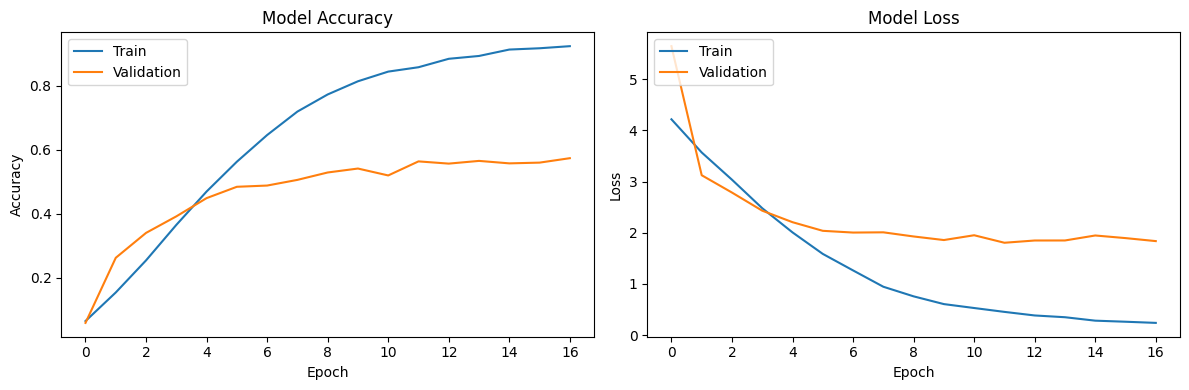

In [177]:
plt.figure(figsize=(12, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])         # train accuracy
plt.plot(history.history['val_accuracy'])     # validation accuracy
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])             # train loss
plt.plot(history.history['val_loss'])         # validation loss
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

#### Training
The model was trained for several epochs, and training/validation accuracy and loss were tracked.

Suggestions:

- Show graphs of training vs validation accuracy/loss

- Mention if overfitting or underfitting was observed

## Handle Overfitting
From the graph above shows our model is overfitting, because train is 99%. We can handle it with adjust Data Generator

In [192]:
datagen = ImageDataGenerator(validation_split=0.2,
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [193]:
train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col='filename',
    y_col='label',
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col='filename',
    y_col='label',
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 5200 validated image filenames belonging to 75 classes.
Found 1299 validated image filenames belonging to 75 classes.


In [194]:
num_classes = len(train_generator.class_indices)

model = Sequential([
    Input(shape=(150, 150,3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [195]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=val_generator, epochs=25)

Epoch 1/25


C:\Users\MrBento\anaconda3\envs\streamlit-env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


325/325 ━━━━━━━━━━━━━━━━━━━━ 52s 156ms/step - accuracy: 0.0235 - loss: 4.3573 - val_accuracy: 0.0662 - val_loss: 3.8564
Epoch 2/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 50s 154ms/step - accuracy: 0.1037 - loss: 3.6144 - val_accuracy: 0.1978 - val_loss: 3.0525
Epoch 3/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 51s 157ms/step - accuracy: 0.2059 - loss: 2.9302 - val_accuracy: 0.2633 - val_loss: 2.6879
Epoch 4/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 50s 154ms/step - accuracy: 0.2712 - loss: 2.6134 - val_accuracy: 0.2879 - val_loss: 2.6009
Epoch 5/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 50s 154ms/step - accuracy: 0.3269 - loss: 2.3852 - val_accuracy: 0.3403 - val_loss: 2.3763
Epoch 6/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 50s 155ms/step - accuracy: 0.3702 - loss: 2.2215 - val_accuracy: 0.3826 - val_loss: 2.2474
Epoch 7/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 50s 155ms/step - accuracy: 0.4259 - loss: 2.1165 - val_accuracy: 0.3841 - val_loss: 2.1868
Epoch 8/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 51s 155ms/step - accuracy: 0.4292 - loss: 2.0038 - val

The last accuracy we got is 62%

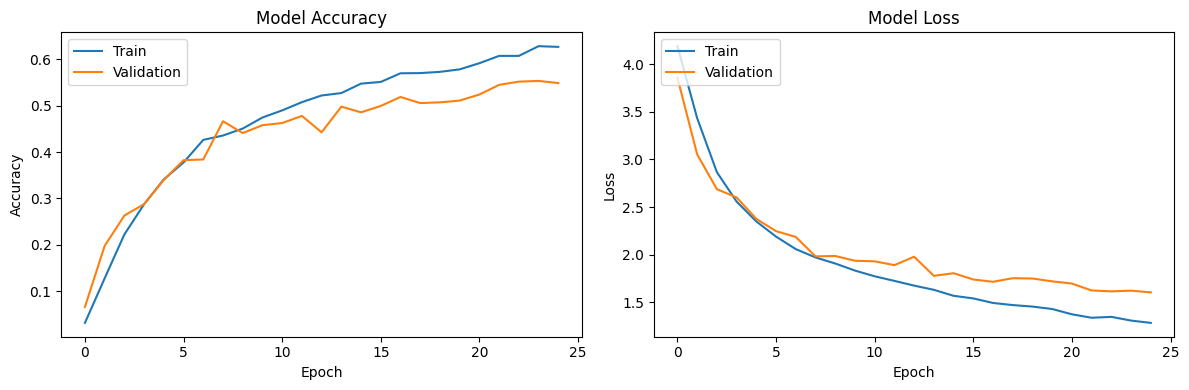

In [197]:
plt.figure(figsize=(12, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])         # train accuracy
plt.plot(history.history['val_accuracy'])     # validation accuracy
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])             # train loss
plt.plot(history.history['val_loss'])         # validation loss
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

The graph shows when we add more epoch, we can got more accurate prediction

In [198]:
label_map = train_generator.class_indices
label_map = {v: k for k, v in label_map.items()}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image_2 in DataFrame, Label: ADONIS, Predicted: ADONIS


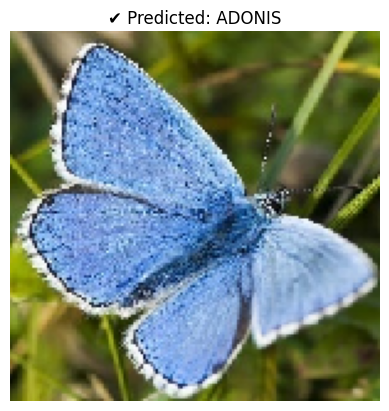

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Image_4 in DataFrame, Label: MONARCH, Predicted: MONARCH


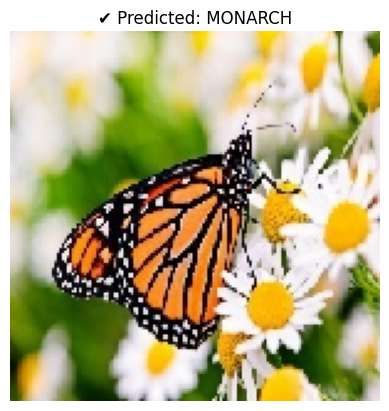

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Image_5 in DataFrame, Label: GREEN CELLED CATTLEHEART, Predicted: GREEN CELLED CATTLEHEART


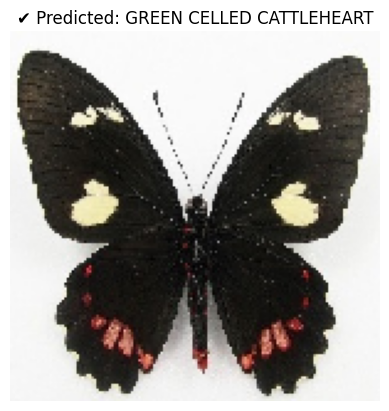

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image_6 in DataFrame, Label: CAIRNS BIRDWING, Predicted: CAIRNS BIRDWING


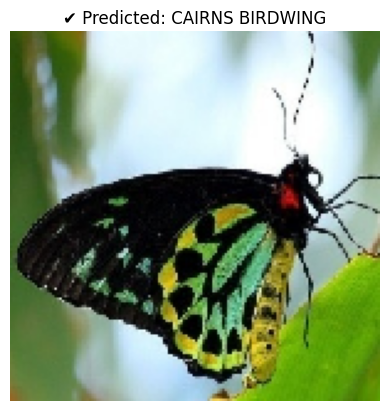

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Image_9 in DataFrame, Label: BROWN SIPROETA, Predicted: BROWN SIPROETA


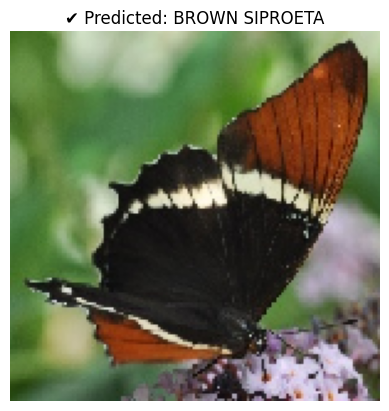

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image_13 in DataFrame, Label: CABBAGE WHITE, Predicted: CABBAGE WHITE


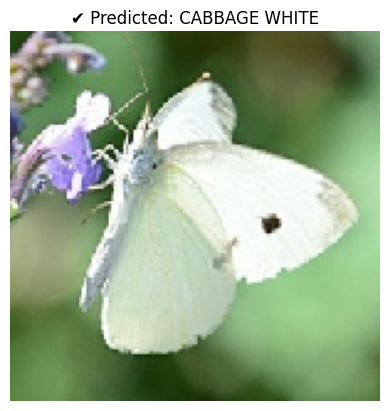

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image_14 in DataFrame, Label: RED ADMIRAL, Predicted: RED ADMIRAL


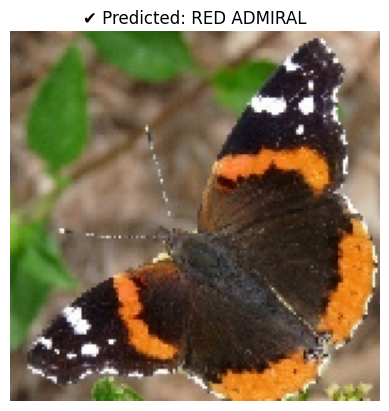

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Image_15 in DataFrame, Label: PAINTED LADY, Predicted: PAINTED LADY


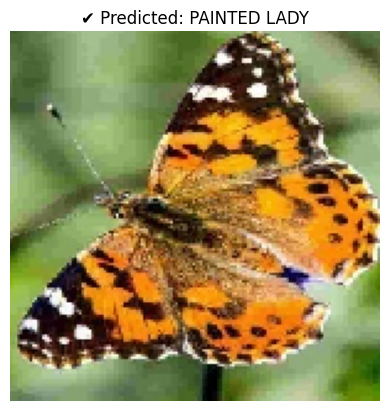

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Image_16 in DataFrame, Label: MANGROVE SKIPPER, Predicted: MANGROVE SKIPPER


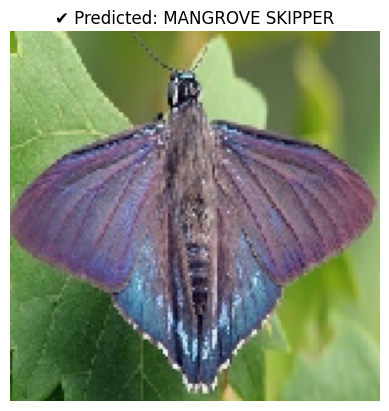

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Image_18 in DataFrame, Label: SOOTYWING, Predicted: SOOTYWING


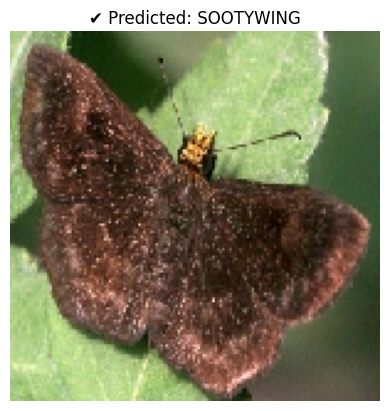

In [208]:
count = 0

for idx, row in df.iterrows():
    filename = row['filename']
    true_label = row['label']
    img_path = filename

    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    predicted_class = np.argmax(pred[0])
    predicted_label = label_map[predicted_class]

    if predicted_label == true_label:
        print(f"Image_{idx+1} in DataFrame, Label: {true_label}, Predicted: {predicted_label}")
        
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"✔ Predicted: {predicted_label}")
        plt.show()

        count += 1
        if count == 10:
            break

## Improvements and Next Steps
Potential areas for improvement could include:

- Trying more advanced architectures (e.g., EfficientNet, Inception)

- Fine-tuning a pre-trained model (transfer learning)

- Increasing dataset size or quality

- Applying more advanced augmentation

- Using learning rate schedules or early stopping

## Conclusion
The project successfully demonstrates how deep learning and computer vision can be used to classify butterfly species. With further refinement and more data, such a model could be used for real-world biodiversity monitoring applications.